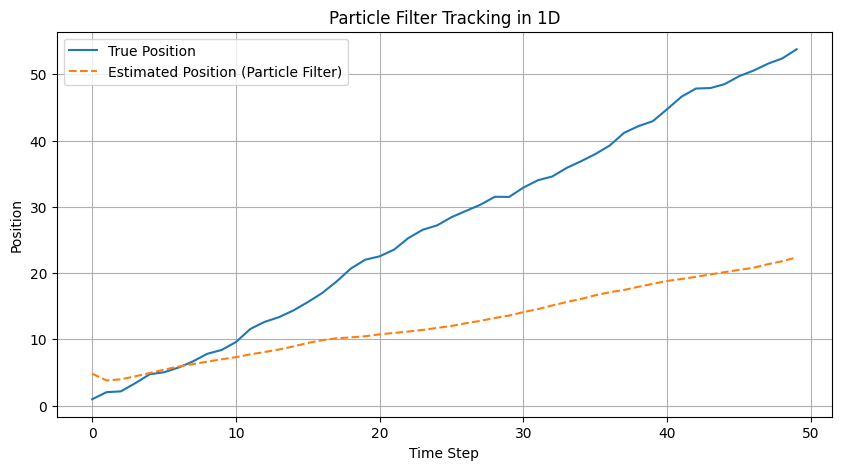

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of particles
N = 1000
# Number of time steps
T = 50

# Initialize particle positions
particles = np.random.uniform(0, 100, N)
weights = np.ones(N) / N

# Store data
true_positions = []
estimates = []

# Simulation
true_position = 0.0
velocity = 1.0

# Noise parameters
motion_noise = 0.5
measurement_noise = 2.0

for t in range(T):
    # --- True motion (object moves forward with constant velocity) ---
    true_position += velocity + np.random.normal(0, motion_noise)
    true_positions.append(true_position)

    # --- Measurement (noisy observation of the true position) ---
    measurement = true_position + np.random.normal(0, measurement_noise)

    # --- Particle prediction (motion update) ---
    particles += velocity + np.random.normal(0, motion_noise, N)

    # --- Weight update based on measurement likelihood ---
    weights = np.exp(- (particles - measurement)*2 / (2 * measurement_noise*2))
    weights += 1.e-300  # avoid divide by zero
    weights /= np.sum(weights)  # normalize

    # --- Estimate state as the weighted average ---
    estimate = np.sum(particles * weights)
    estimates.append(estimate)

    # --- Resampling ---
    indices = np.random.choice(range(N), size=N, p=weights)
    particles = particles[indices]
    weights = np.ones(N) / N

# --- Plotting results ---
plt.figure(figsize=(10, 5))
plt.plot(true_positions, label='True Position')
plt.plot(estimates, label='Estimated Position (Particle Filter)', linestyle='--')
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("Particle Filter Tracking in 1D")
plt.legend()
plt.grid(True)
plt.show()